# HW7

Amirhossein Hassani - 99103803

Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the Csv file into a DataFrame

In [3]:
csv_file_path ='C:\\Users\\ASUS\\Desktop\\Uni\\Transportation planning\\Home works\\HW7-asli\\Divvy_Trips_2014_Q1Q2.csv'

data = pd.read_csv(csv_file_path)

# Q1

Calculating the mean duration of travel time for all trips.
This metric gives an overall understanding of the average trip duration.

In [4]:
mean_duration = data['tripduration'].mean()

In [5]:
mean_duration

1073.3214931229911

The number above shows the average trip duration in 'seconds', and we can convert it to 'minute'.

In [6]:
mean_duration/60

17.888691552049853

# Q2

Finding minimum and maximum travel times and Extracting information such as travel time, from station, and to station for both cases.

In [7]:
# Find minimum and maximum travel times
min_travel_time = data['tripduration'].min()
max_travel_time = data['tripduration'].max()

# Extract rows with minimum travel time
min_travel_time_rows = data.query(f'tripduration == {min_travel_time}')

# Extract rows with maximum travel time
max_travel_time_rows = data.query(f'tripduration == {max_travel_time}')

# Display information for minimum travel time
print(f"Minimum Travel Time: {min_travel_time} seconds")
for _, row in min_travel_time_rows.iterrows():
    stations = (row['from_station_name'], row['to_station_name'])
    print(f"Stations: {stations}")

# Display information for maximum travel time
print(f"\nMaximum Travel Time: {max_travel_time} seconds")
for _, row in max_travel_time_rows.iterrows():
    stations = (row['from_station_name'], row['to_station_name'])
    print(f"Stations: {stations}")

Minimum Travel Time: 60 seconds
Stations: ('Marshfield Ave & Cortland St', 'Marshfield Ave & Cortland St')
Stations: ('Larrabee St & Kingsbury St', 'Larrabee St & Kingsbury St')
Stations: ('May St & Fulton St', 'May St & Fulton St')
Stations: ('Mies van der Rohe Way & Chicago Ave', 'Mies van der Rohe Way & Chicago Ave')
Stations: ('Martin Luther King Dr & 29th St', 'Martin Luther King Dr & 29th St')
Stations: ('Wabash Ave & Roosevelt Rd', 'Wabash Ave & Roosevelt Rd')
Stations: ('Indiana Ave & Roosevelt Rd', 'Indiana Ave & Roosevelt Rd')
Stations: ('Wells St & Evergreen Ave', 'Wells St & Evergreen Ave')
Stations: ('State St & Randolph St', 'State St & Randolph St')
Stations: ('Prairie Ave & Garfield Blvd', 'Prairie Ave & Garfield Blvd')
Stations: ('Theater on the Lake', 'Theater on the Lake')
Stations: ('Adler Planetarium', 'Adler Planetarium')
Stations: ('Dearborn St & Adams St', 'Dearborn St & Adams St')
Stations: ('Halsted St & Roscoe St', 'Halsted St & Roscoe St')
Stations: ('Orlean

In [9]:
min_travel_time

60

In [11]:
max_travel_time

86245

# Q3 & Q4

Identifying the most common start and destination stations based on the mode.

In [9]:
# Station that generates more trips 
most_common_from_station = data['from_station_name'].mode().values[0]

# Station that attracts more trips
most_common_to_station = data['to_station_name'].mode().values[0]

print(f"Station that generates more trips: {most_common_from_station}\n")
print(f"Station that attracts more trips: {most_common_to_station}\n")

Station that generates more trips: Streeter Dr & Illinois St

Station that attracts more trips: Streeter Dr & Illinois St



# Q5

Finding the station pairs with the minimum and maximum number of trips and Extracting information such as station names and the exact number of trips for both cases.

In [10]:
# Find the stations with the minimum and maximum number of trips
min_trips_station_pair = data.groupby(['from_station_id', 'to_station_id']).size().idxmin()
max_trips_station_pair = data.groupby(['from_station_id', 'to_station_id']).size().idxmax()

# Get the exact number of trips
min_trips_count = data.groupby(['from_station_id', 'to_station_id']).size().min()
max_trips_count = data.groupby(['from_station_id', 'to_station_id']).size().max()

# Extract station names
min_from_station_name = data[data['from_station_id'] == min_trips_station_pair[0]]['from_station_name'].values[0]
min_to_station_name = data[data['to_station_id'] == min_trips_station_pair[1]]['to_station_name'].values[0]

max_from_station_name = data[data['from_station_id'] == max_trips_station_pair[0]]['from_station_name'].values[0]
max_to_station_name = data[data['to_station_id'] == max_trips_station_pair[1]]['to_station_name'].values[0]

print(f"Minimum trips occurred between stations: {min_from_station_name} (ID {min_trips_station_pair[0]}) and {min_to_station_name} (ID {min_trips_station_pair[1]}), Trips: {min_trips_count}\n")
print(f"Maximum trips occurred between stations: {max_from_station_name} (ID {max_trips_station_pair[0]}) and {max_to_station_name} (ID {max_trips_station_pair[1]}), Trips: {max_trips_count}\n")


Minimum trips occurred between stations: State St & Harrison St (ID 5) and Wilton Ave & Diversey Pkwy (ID 13), Trips: 1

Maximum trips occurred between stations: Lake Shore Dr & Monroe St (ID 76) and Streeter Dr & Illinois St (ID 35), Trips: 2986



# Q6

In this section, we will examine the behavior of two types of Users (Customer and Subscriber) regarding bicycle usage, using multiple criteria. We will illustrate the relevant charts for each segment, and at the end of each chart, we will provide a general analysis.

First of all we create a new column 'user_category' to distinguish between Customer and Subscriber

In [11]:
data['user_category'] = data['usertype'].apply(lambda x: 'Subscriber' if x == 'Subscriber' else 'Customer')

In [12]:
data

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,user_category
0,2355134,6/30/2014 23:57,7/1/2014 0:07,2006,604,131,Lincoln Ave & Belmont Ave,303,Broadway & Cornelia Ave,Subscriber,Male,1988.0,Subscriber
1,2355133,6/30/2014 23:56,7/1/2014 0:00,2217,263,282,Halsted St & Maxwell St,22,May St & Taylor St,Subscriber,Male,1992.0,Subscriber
2,2355130,6/30/2014 23:33,6/30/2014 23:35,2798,126,327,Sheffield Ave & Webster Ave,225,Halsted St & Dickens Ave,Subscriber,Male,1993.0,Subscriber
3,2355129,6/30/2014 23:26,7/1/2014 0:24,173,3481,134,Peoria St & Jackson Blvd,194,State St & Wacker Dr,Subscriber,Female,1988.0,Subscriber
4,2355128,6/30/2014 23:16,6/30/2014 23:26,173,638,320,Loomis St & Lexington St,134,Peoria St & Jackson Blvd,Subscriber,Female,1988.0,Subscriber
...,...,...,...,...,...,...,...,...,...,...,...,...,...
905694,1109432,1/1/2014 1:43,1/1/2014 1:53,823,652,113,Bissell St & Armitage Ave,94,Clark St & Armitage Ave,Subscriber,Male,1988.0,Subscriber
905695,1109431,1/1/2014 1:43,1/1/2014 1:53,348,650,113,Bissell St & Armitage Ave,94,Clark St & Armitage Ave,Subscriber,Male,1988.0,Subscriber
905696,1109427,1/1/2014 1:12,1/1/2014 1:18,1818,346,240,Sheridan Rd & Irving Park Rd,245,Clarendon Ave & Junior Ter,Subscriber,Male,1961.0,Subscriber
905697,1109421,1/1/2014 0:45,1/1/2014 0:55,2981,608,69,Damen Ave & Pierce Ave,216,California Ave & Division St,Customer,NaN,NaN,Customer


Our first criterion is the number of trips taken by each of these two types of users, which we will represent in a bar chart.

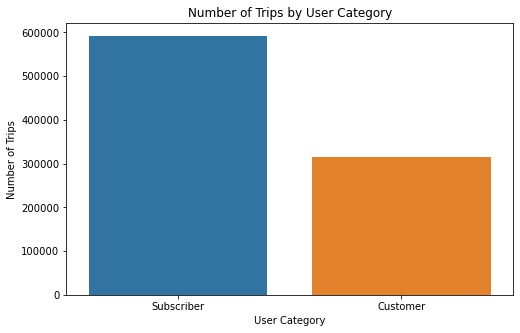

In [13]:
# Plotting a bar chart for the count of trips by user category
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='user_category')
plt.title('Number of Trips by User Category')
plt.xlabel('User Category')
plt.ylabel('Number of Trips')
plt.show()

Data Representation:
The x-axis represents the User Category, with two bars corresponding to 'Subscriber' and 'Customer.'
The y-axis indicates the number of trips for each user category.

Observations:
The count plot shows that the number of trips made by Subscribers is significantly higher than that of Customers.
The 'Subscriber' bar is visibly taller, indicating a greater volume of trips attributed to this user category.
The 'Customer' bar is comparatively shorter, signifying a lower number of trips for customers.

Implications:
The visualization suggests that the bike-sharing system caters more to Subscribers, who likely use the service for routine commuting or daily transportation needs.
Customers, on the other hand, appear to contribute a smaller portion of the overall trip count, possibly indicating a different pattern of usage, such as occasional or recreational rides.

Decision-Making Insights:
The insight derived from this plot can influence decision-making processes related to resource allocation, marketing strategies, and service improvements.
Understanding the distribution of trips among user categories is crucial for optimizing bike availability, station infrastructure, and tailoring promotional efforts to specific user needs.
In summary, this count plot effectively communicates the disparity in the number of trips between Subscribers and Customers, providing valuable insights for strategic planning and service enhancements in the bike-sharing system.

Our next criterion is the distribution of bike usage for both Subscribers and Customers based on Bike IDs which we will represent in a histogram.

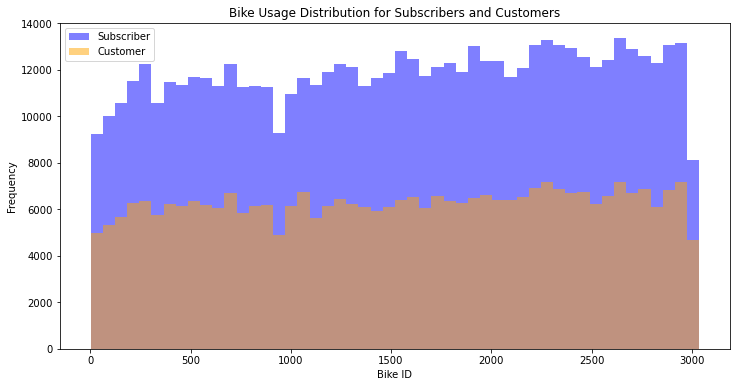

In [14]:

# Create separate histograms for bike usage for Subscribers and Customers
plt.figure(figsize=(12, 6))
plt.hist(data[data['usertype'] == 'Subscriber']['bikeid'], bins=50, alpha=0.5, label='Subscriber', color='blue')
plt.hist(data[data['usertype'] == 'Customer']['bikeid'], bins=50, alpha=0.5, label='Customer', color='orange')

plt.title('Bike Usage Distribution for Subscribers and Customers')
plt.xlabel('Bike ID')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Data Representation:
The x-axis represents the Bike ID, with each bar corresponding to a specific bike.
The y-axis indicates the frequency or the number of occurrences of each bike.

Observations:
The histogram is divided into two sets of bars, distinguished by color: blue for Subscribers and orange for Customers.
Each bar represents a specific Bike ID, and the height of the bar corresponds to the frequency of usage for that particular bike.

Interpretation:
The histogram provides insights into the popularity or likability of individual bikes among Subscribers and Customers.
Higher bars indicate bikes that are more frequently used, while lower bars suggest bikes with less usage.

Comparative Analysis:
By comparing the blue (Subscribers) and orange (Customers) bars, you can identify whether certain bikes are preferred more by one user category over the other.
Similarities or differences in the distribution patterns may indicate specific bikes that are more popular among Subscribers or Customers.

Implications:
Identifying popular bikes can be valuable for maintenance and resource allocation. It helps ensure that frequently used bikes are well-maintained and readily available.
The distribution patterns may inform decisions on redistributing bikes across stations to meet demand or retiring bikes that are less frequently utilized.

Decision-Making Insights:
Bike-sharing operators can use this information to optimize their fleet management, improving the overall user experience.
Marketing efforts can be tailored based on the popularity of certain bikes to enhance user engagement and satisfaction.
In summary, this histogram provides a visual representation of bike usage patterns, allowing for a nuanced understanding of which bikes are more likable or preferred by Subscribers and Customers.

The other criterion is the count of trips by day of the week for Subscribers and Customers which we will represent in a chart.

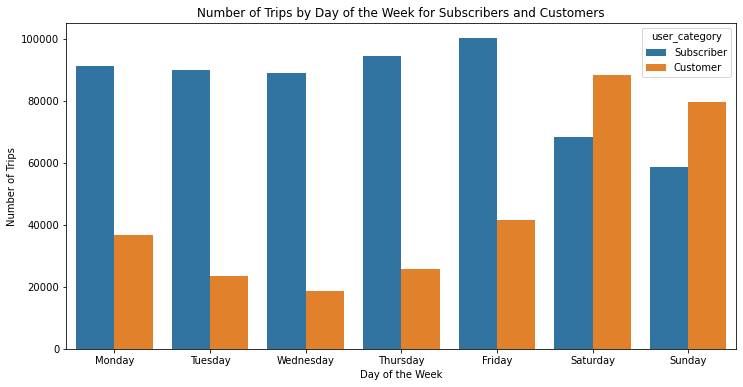

In [15]:
# Visualize the count of trips by day of the week for Subscribers and Customers
data['starttime'] = pd.to_datetime(data['starttime'])
data['day_of_week'] = data['starttime'].dt.day_name()

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='day_of_week', hue='user_category', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Trips by Day of the Week for Subscribers and Customers')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.show()

Data Preparation:
The 'starttime' column has been converted to a datetime format, allowing for the extraction of the day of the week.
A new column, 'day_of_week,' has been created, indicating the day (e.g., Monday, Tuesday) for each trip.

Data Representation:
The x-axis represents the days of the week, ordered from Monday to Sunday.
The y-axis indicates the number of trips.

Observations:
The plot provides a clear overview of how the number of trips varies throughout the week for Subscribers and Customers.
For both user categories, there may be observable patterns or trends in terms of when users are more likely to take trips.

Comparative Analysis:
By comparing the bars of different colors for each day, we can identify which days have higher or lower trip counts for Subscribers and Customers.
Differences in peak usage days or specific days with notable variations can be discerned.
As we can observe, Customer bike usage increases during the weekends, indicating that this group of users utilizes bicycles for recreational purposes. On the other hand, Subscribers show relatively consistent usage without significant fluctuations. Consequently, it can be inferred that this user type employs bicycles for various and consistent purposes over time.

Interpretation:
Patterns in usage by day of the week may provide insights into user behavior, such as commuting patterns for Subscribers or recreational use by Customers.
Peak days for each user category can be crucial for optimizing bike availability, station resources, and marketing strategies.

Implications:
The plot helps in understanding the demand patterns on different days, allowing for informed decisions regarding resource allocation and operational planning.
Identifying peak usage days can guide the implementation of targeted promotions or incentives to boost ridership on specific days.

In summary, this count plot is an effective tool for visualizing and comparing the distribution of trips across days of the week for Subscribers and Customers. It provides valuable insights into temporal usage patterns that can inform strategic decisions for bike-sharing system management.

The other criterion is the count of trips by hour of the day for Subscribers and Customers which we will represent in a count plot.

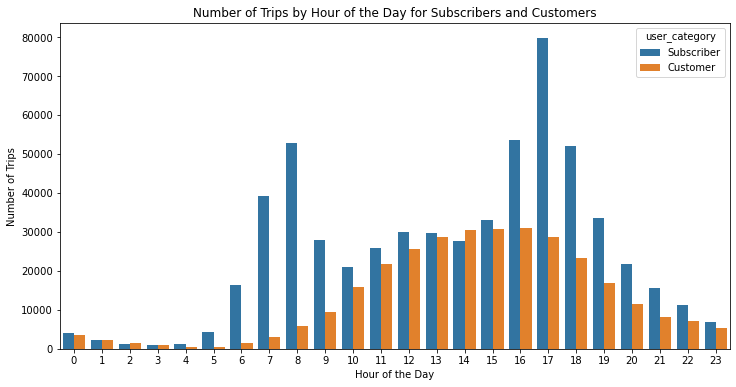

In [16]:
# Visualize the count of trips by hour of the day for Subscribers and Customers
data['hour_of_day'] = data['starttime'].dt.hour

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='hour_of_day', hue='user_category')
plt.title('Number of Trips by Hour of the Day for Subscribers and Customers')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

Data Preparation:
The 'starttime' column has been used to extract the hour of the day.
A new column, 'hour_of_day,' has been created to represent the hour component of the trip start time.

Data Representation:
The x-axis represents the hours of the day, ranging from 0 (midnight) to 23 (11 PM).
The y-axis indicates the number of trips.
Bars are color-coded to distinguish between Subscribers and Customers, with different hues for each user category.

Observations:
The plot provides a visual representation of how the number of trips varies throughout the day for both Subscribers and Customers.
Peaks and troughs in the bars can highlight specific hours with higher or lower trip counts.

Comparative Analysis:
By comparing bars of different colors for each hour, you can identify peak usage hours and any notable variations in trip counts between Subscribers and Customers.
Differences in usage patterns during different hours of the day may indicate distinct user behaviors.
As observed in the chart,Subscribers tend to have higher bicycle usage during the early morning hours and in the late afternoon, between 4 to 7 PM. This indicates that they likely use bicycles for commuting to various places, including workplaces. On the other hand, regular users show a higher usage in the afternoon with a very gentle slope, suggesting consistent usage during that time, possibly for recreational purposes.

Interpretation:
Patterns in trip counts by hour can offer insights into commuting habits, popular hours for recreational rides, or other temporal trends.
Identifying peak usage hours is valuable for optimizing bike availability, station resources, and scheduling maintenance activities.

Implications:
The plot aids in understanding the temporal dynamics of bike usage, allowing for strategic decisions related to service hours, staffing, and resource allocation.
It can guide targeted promotions or incentives during specific hours to encourage ridership.
In summary, this count plot effectively visualizes and compares the distribution of trips across hours of the day for Subscribers and Customers. It offers valuable insights into temporal usage patterns, which can inform operational decisions and enhance the overall efficiency of the bike-sharing system.

The other criterion is the number of trips by top start stations for Subscribers and Customers which we will represent in a bar plot.

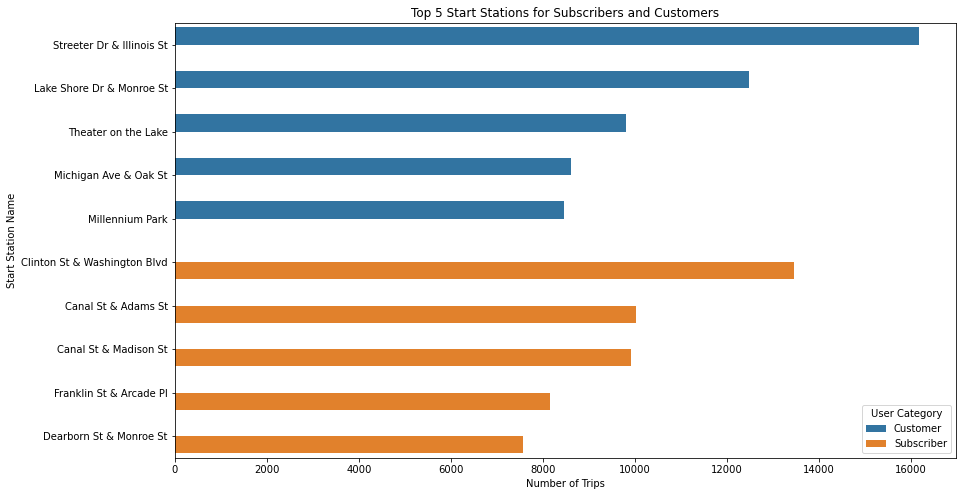

In [17]:
# Group by user category and start station, then count the number of trips from each start station
start_counts = data.groupby(['user_category', 'from_station_name']).size().reset_index(name='count')

# Get the top 5 start stations for Subscribers and Customers
top_starts = start_counts.sort_values(by=['user_category', 'count'], ascending=[True, False]) \
                         .groupby('user_category').head(5)

# Create a bar chart to visualize the top start stations
plt.figure(figsize=(14, 8))
sns.barplot(data=top_starts, x='count', y='from_station_name', hue='user_category')
plt.title('Top 5 Start Stations for Subscribers and Customers')
plt.xlabel('Number of Trips')
plt.ylabel('Start Station Name')
plt.legend(title='User Category')
plt.show()

In [18]:
top_starts

,user_category,from_station_name,count
269,Customer,Streeter Dr & Illinois St,16165
147,Customer,Lake Shore Dr & Monroe St,12483
270,Customer,Theater on the Lake,9802
188,Customer,Michigan Ave & Oak St,8608
192,Customer,Millennium Park,8466
369,Subscriber,Clinton St & Washington Blvd,13463
336,Subscriber,Canal St & Adams St,10018
339,Subscriber,Canal St & Madison St,9912
402,Subscriber,Franklin St & Arcade Pl,8152
394,Subscriber,Dearborn St & Monroe St,7554


Data Preparation:
The data has been grouped by both 'user_category' and 'from_station_name.'
The count of trips from each start station has been calculated and stored in the 'count' column.

Data Representation:
The x-axis represents the number of trips, and the y-axis represents the start station names.
Separate bars are created for Subscribers and Customers, each showing the top 5 start stations.
Colors distinguish between Subscribers and Customers.

Observations:
The plot allows for a quick comparison of the most popular start stations for both user categories.
Each bar corresponds to a start station, and the length of the bar indicates the number of trips originating from that station.

Comparative Analysis:
By comparing bars of different colors for each station, you can identify which stations are more popular among Subscribers or Customers.
Differences in bar lengths highlight stations with varying levels of usage between the two user categories.
As we can see "Clinton St & Washington Blvd" is the most popular start station among Subscribers and "Streeter Dr & Illinois St" is the most popular start station among Customers.

Interpretation:
The longer bars represent start stations with a higher number of trips, indicating greater popularity among users.
Stations with similar bar lengths for both user categories may indicate a balanced usage pattern.

Implications:
Knowledge of the most popular start stations is crucial for station management, ensuring sufficient bike availability and addressing potential congestion issues.
This information can guide decisions related to station expansion, bike redistribution strategies, and infrastructure improvements.
In summary, the bar chart effectively visualizes and compares the top 5 start stations for Subscribers and Customers, providing valuable insights into user preferences and station popularity within the bike-sharing system.

The other criterion is the number of trips by top destination stations for Subscribers and Customers which we will represent in a bar plot.

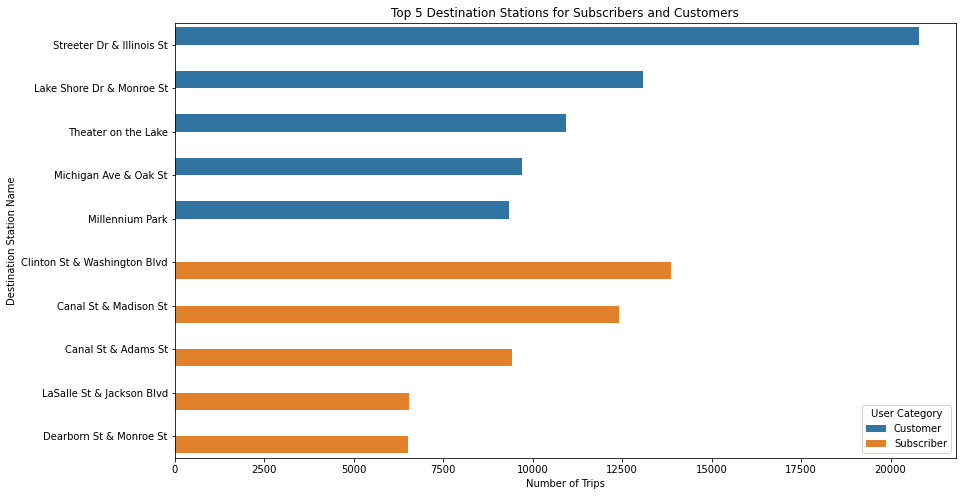

In [19]:
#Group by user category and destination station, then count the number of trips to each destination
destination_counts = data.groupby(['user_category', 'to_station_name']).size().reset_index(name='count')

#Get the top 5 destination stations for Subscribers and Customers
top_destinations = destination_counts.sort_values(by=['user_category', 'count'], ascending=[True, False]) \
                                    .groupby('user_category').head(5)

#Create a bar chart to visualize the top destination stations
plt.figure(figsize=(14, 8))
sns.barplot(data=top_destinations, x='count', y='to_station_name', hue='user_category')
plt.title('Top 5 Destination Stations for Subscribers and Customers')
plt.xlabel('Number of Trips')
plt.ylabel('Destination Station Name')
plt.legend(title='User Category')
plt.show()

In [20]:
top_destinations

,user_category,to_station_name,count
269,Customer,Streeter Dr & Illinois St,20790
147,Customer,Lake Shore Dr & Monroe St,13096
270,Customer,Theater on the Lake,10944
188,Customer,Michigan Ave & Oak St,9702
192,Customer,Millennium Park,9337
369,Subscriber,Clinton St & Washington Blvd,13852
339,Subscriber,Canal St & Madison St,12402
336,Subscriber,Canal St & Adams St,9419
441,Subscriber,LaSalle St & Jackson Blvd,6535
394,Subscriber,Dearborn St & Monroe St,6528


Data Preparation:
The data has been grouped by both 'user_category' and 'to_station_name.'
The count of trips to each destination station has been calculated and stored in the 'count' column.

Data Representation:
The x-axis represents the number of trips, and the y-axis represents the destination station names.
Separate bars are created for Subscribers and Customers, each showing the top 5 destination stations.
Colors distinguish between Subscribers and Customers.

Observations:
The plot allows for a quick comparison of the most popular destination stations for both user categories.
Each bar corresponds to a destination station, and the length of the bar indicates the number of trips terminating at that station.

Comparative Analysis:
By comparing bars of different colors for each station, you can identify which stations are more popular as destinations for Subscribers or Customers.
Differences in bar lengths highlight stations with varying levels of usage between the two user categories.
As we can see "Clinton St & Washington Blvd" is the most popular destination station among Subscribers and "Streeter Dr & Illinois St" is the most popular destination station among Customers.
Interpretation:
Longer bars represent destination stations with a higher number of trips, indicating greater popularity among users.
Stations with similar bar lengths for both user categories may indicate a balanced usage pattern as both Subscribers and Customers choose those stations as destinations.

Implications:
Knowledge of the most popular destination stations is crucial for station management, ensuring that stations have sufficient capacity for incoming bikes and addressing potential congestion issues.
This information can guide decisions related to station expansion, bike redistribution strategies, and infrastructure improvements.
In summary, the bar chart effectively visualizes and compares the top 5 destination stations for Subscribers and Customers, providing valuable insights into user preferences and station popularity within the bike-sharing system.

The next plot is not a new criterion but it has three attributes and indicates trips Heatmap by Day of the Week and Hour of the Day for Subscribers and Customers

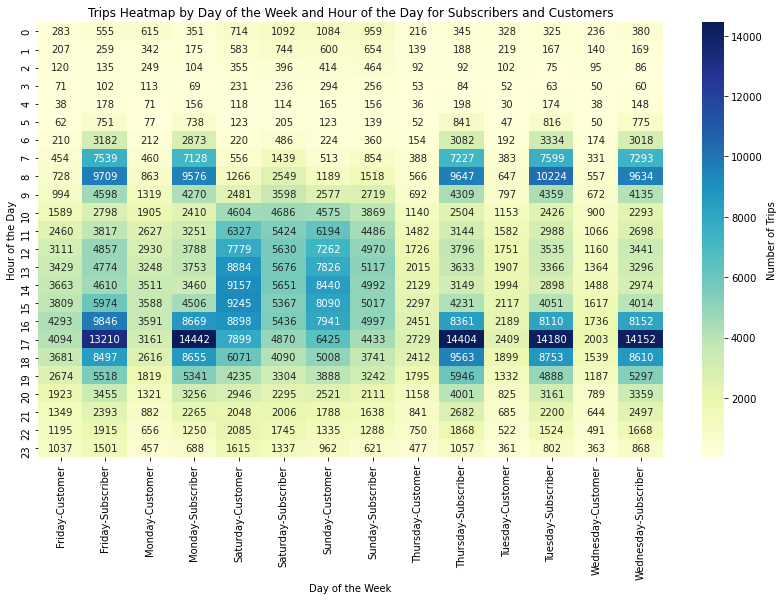

In [21]:
# Create a pivot table for the heatmap
heatmap_data = data.groupby(['day_of_week', 'hour_of_day', 'user_category']).size().reset_index(name='count')
heatmap_data = heatmap_data.pivot_table(index='hour_of_day', columns=['day_of_week', 'user_category'], values='count', fill_value=0)

# Create a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Number of Trips'})
plt.title('Trips Heatmap by Day of the Week and Hour of the Day for Subscribers and Customers')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()

Data Preparation:
The data has been grouped by 'day_of_week,' 'hour_of_day,' and 'user_category.'
The count of trips for each combination has been calculated and stored in the 'count' column.
A pivot table has been created with 'hour_of_day' as the index, 'day_of_week' and 'user_category' as columns, and 'count' as the values.

Data Representation:
The x-axis represents the 'day_of_week,' and the y-axis represents the 'hour_of_day.'
Each cell in the heatmap represents the number of trips during a specific day of the week and hour of the day.
Colors in the heatmap indicate the intensity of trip counts, with a color scale ranging from low (lighter) to high (darker).

Observations:
The heatmap provides a comprehensive view of how the number of trips varies across different days of the week and hours of the day for both Subscribers and Customers.
Darker cells indicate higher trip counts, helping to identify peak usage periods.

Patterns and Trends:
Patterns in the heatmap may reveal peak usage hours on specific days, helping to identify temporal trends in bike-sharing usage.
Differences in intensity between Subscribers and Customers may highlight variations in usage patterns. As observed in the chart,Subscribers tend to have higher bicycle usage during the early morning hours and in the late afternoon, between 4 to 7 PM of the weekdays. This indicates that they likely use bicycles for commuting to various places, including workplaces. On the other hand, regular users show a higher usage in the afternoon of the weekend, with a very gentle slope, suggesting consistent usage during that time, possibly for recreational purposes.

Implications:
The heatmap is valuable for understanding temporal patterns in bike-sharing usage, enabling more targeted and effective operational planning.
Operators can use this information to optimize resource allocation, adjust staffing levels, and implement targeted promotions during peak hours.
In summary, the heatmap effectively visualizes the spatiotemporal distribution of bike-sharing trips, providing insights into when and how intensively users engage with the system on different days of the week and hours of the day.

The next criterion is trip duration for both user types.

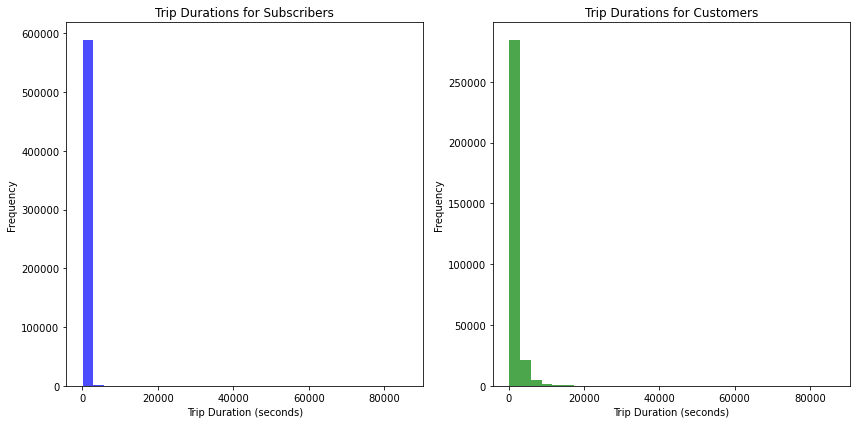

In [22]:
subscriber_data = data[data['usertype'] == 'Subscriber']
customer_data = data[data['usertype'] == 'Customer']

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(subscriber_data['tripduration'], bins=30, color='blue', alpha=0.7)
plt.title('Trip Durations for Subscribers')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(customer_data['tripduration'], bins=30, color='green', alpha=0.7)
plt.title('Trip Durations for Customers')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Data Preparation:
Two separate datasets have been created: one for Subscribers (subscriber_data) and one for Customers (customer_data).
The 'tripduration' column is used to represent the duration of trips in seconds.

Data Representation:
The histograms are organized in a side-by-side layout, with Subscribers on the left (in blue) and Customers on the right (in green).
Each histogram represents the distribution of trip durations for the respective user category.

Observations:
The left histogram (for Subscribers) and the right histogram (for Customers) provide insights into the patterns of trip durations for each user category.
The x-axis represents the trip duration in seconds, while the y-axis indicates the frequency or count of trips.

Comparative Analysis:
By comparing the histograms, we can identify similarities or differences in the distribution of trip durations between Subscribers and Customers.But as we can see both of them have a duration between 0 and 20000.

Interpretation:
Peaks in the histograms indicate common trip duration intervals that are more frequent for Subscribers or Customers.

Implications:
Understanding the distribution of trip durations is valuable for optimizing bike availability, station turnover, and resource allocation.
Differences in trip duration patterns may inform targeted marketing strategies or service improvements tailored to the preferences of each user category.

The other criterion is trip counts over months for Subscribers and Customers.

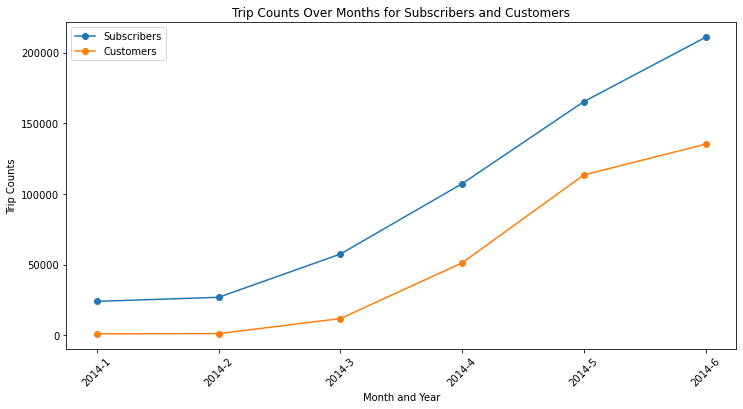

In [23]:
# Convert starttime to datetime format
data['starttime'] = pd.to_datetime(data['starttime'])

# Extract month and year information
data['month'] = data['starttime'].dt.month
data['year'] = data['starttime'].dt.year

# Filter data for Subscribers and Customers
subscriber_data = data[data['usertype'] == 'Subscriber']
customer_data = data[data['usertype'] == 'Customer']

# Group data by month and year, and calculate trip counts
subscriber_trip_counts = subscriber_data.groupby(['year', 'month']).size().reset_index(name='trip_count')
customer_trip_counts = customer_data.groupby(['year', 'month']).size().reset_index(name='trip_count')

# Create a line plot for Subscribers
plt.figure(figsize=(12, 6))
plt.plot(subscriber_trip_counts['year'].astype(str) + '-' + subscriber_trip_counts['month'].astype(str), subscriber_trip_counts['trip_count'], label='Subscribers', marker='o')

# Create a line plot for Customers
plt.plot(customer_trip_counts['year'].astype(str) + '-' + customer_trip_counts['month'].astype(str), customer_trip_counts['trip_count'], label='Customers', marker='o')

# Set plot labels and title
plt.xlabel('Month and Year')
plt.ylabel('Trip Counts')
plt.title('Trip Counts Over Months for Subscribers and Customers')
plt.legend()
plt.xticks(rotation=45)

plt.show()

Data Preparation:
The 'starttime' column has been converted to a datetime format.
Month and year information has been extracted from the 'starttime' column and stored in new columns ('month' and 'year').

Data Representation:
Two separate datasets have been created: one for Subscribers (subscriber_data) and one for Customers (customer_data).
The data has been grouped by month and year, and the trip counts for Subscribers and Customers have been calculated.

Line Plot:
The line plot shows the trend of trip counts over consecutive months for both Subscribers and Customers.
Each point on the line represents the total number of trips for a specific month and year.

Observations:
Trends in the line plot indicate variations in the number of trips over time.
Peaks or valleys in the lines may suggest seasonal patterns or changes in user behavior.

Comparative Analysis:
By comparing the lines for Subscribers and Customers, we can identify whether there are similar or divergent trends over the observed months.
As we can see both charts have shown an upward trend during the mid-year months.

Interpretation:
Peaks in trip counts may correspond to months with higher demand, potentially influenced by weather, events, or other external factors.
Understanding the seasonal trends can inform resource planning, marketing strategies, and infrastructure adjustments.

Implications:
The plot helps in identifying months with increased or decreased demand for bike-sharing services among Subscribers and Customers.
Operators can use this information to allocate resources effectively, plan promotional campaigns, and enhance user experience during peak periods.
In summary, the line plot effectively visualizes and compares the trends of trip counts over months for Subscribers and Customers, offering insights into the temporal dynamics of bike-sharing usage for each user category.

The last criterion is camparing the min and max duration times for Subscribers and Customers.

In [24]:
# Find the maximum duration for Subscribers
min_duration_subscriber = subscriber_data['tripduration'].min()

# Find the minimum duration for Customers
min_duration_customer = customer_data['tripduration'].min()

print(f"Minimum trip duration for Subscribers: {min_duration_subscriber} seconds")
print(f"Minimum trip duration for Customers: {min_duration_customer} seconds")

# Find the maximum duration for Subscribers
max_duration_subscriber = subscriber_data['tripduration'].max()

# Find the maximum duration for Customers
max_duration_customer = customer_data['tripduration'].max()

print(f"Maximum trip duration for Subscribers: {max_duration_subscriber} seconds")
print(f"Maximum trip duration for Customers: {max_duration_customer} seconds")

Minimum trip duration for Subscribers: 60 seconds
Minimum trip duration for Customers: 60 seconds
Maximum trip duration for Subscribers: 85942 seconds
Maximum trip duration for Customers: 86245 seconds


And we can see that the maximums and minimums are close.